# ML LAB 11 - 14 / 10 / 2020 | Sandhya M (1947139)

### Program Description:
- Demonstrate multilayer perceptron using sklearn
- Minimum two different "Network Topologies"
- 3 Different Activation Functions
- MLP for regression.

## MultiLayer Perceptron
- A multi-layered perceptron (MLP) is one of the most common neural network models used in the field of deep learning.
- MLP consists of interconnected neurons transferring information to each other
- Input Layer, Hidden Layer, Output Layer

<img src = "gif.gif" height = "550" width ="550"><img src = "MLP1.PNG" height = "450" width ="450">

## Activation Function
The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. It can be as simple as a step function that turns the neuron output on and off, depending on a rule or threshold. Or it can be a transformation that maps the input signals into output signals that are needed for the neural network to function.

<img src = "activation.PNG" height = "550" width ="550">



#### The Activation Functions can be basically divided into 2 types-
##### 1. Linear Activation Function
##### 2. Non-linear Activation Functions

<img src = "final.PNG" height = "600" width ="550">

**1) ReLU Function - Range: [ 0 to infinity)**

* abbreviation of Rectified Linear Unit
* mostly used to implement hidden layers of Neural Network
* Equation: $A(x) = max(0, x)$, an output is generated if x is positive else it returns 0
* non-linear in nature, since it can easily backpropagate the errors and have multiple layers of neurons being activated by the ReLU function.
* Compared to tanh and sigmoid, ReLU is less computationally expensive as it involves simpler mathematical operations. Since, only a few neurons are activated the network becomes sparse thus making it more efficient and easier for computation.

**2) Sigmoid Function - (0 to 1)**

* a function that is plotted as 'S' shaped graph
* Equation: $A=\frac{1}{1+e^{-x}}$

**3) TanH Function - (-1 to +1)**

* also known as Tangent Hyperbolic Function
* works better than sigmoid fuction
* similar to sigmoid function and can be derived from each other
* it is non-linear in nature
* usually used in hidden layers of neural network.Since it's value lies between -1 and +1, the mean for the hidden layer becomes 0 or close to it, thus helping in centering the data. This allows easier learning for the next layer.

### Applications of MLP : 
* Stock Analysis
* Image Identification
* Spam Detection
* Election Voting Predictions

### Dataset : "House Prices Data" for Classification from UCI Repository

## Import Required Libraries

In [44]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pandas.util.testing as tm
import matplotlib.pyplot as plt

## Import dataset 

In [2]:
#Loading the dataset
Dataset=pd.read_csv('housepricedata.csv')
Dataset.shape

(1460, 11)

In [3]:
Dataset.head(10)

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [4]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


## Correlation Matrix of Dataset 

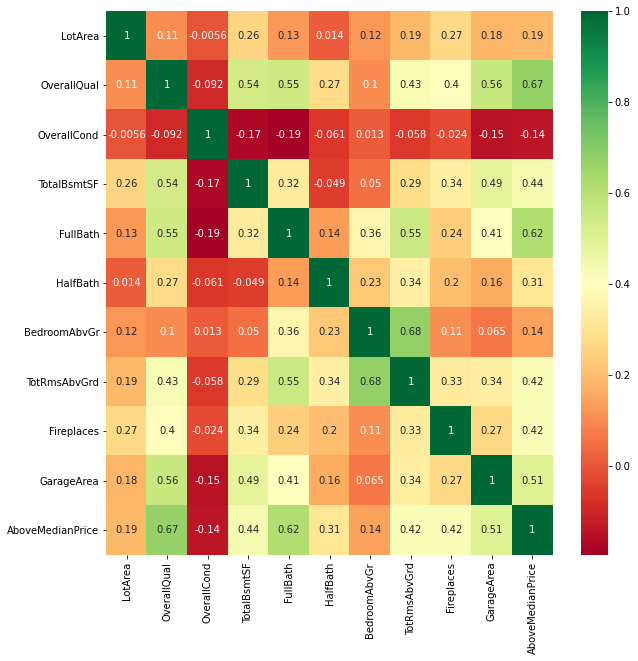

In [5]:
import seaborn as sns
x=Dataset.iloc[:,[0,9]] #independent columns
y=Dataset.iloc[:,[10]]   #target column i.e price range
#get correlations of each features in dataset
corrmat = Dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(Dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
Dataset=Dataset.drop(['OverallCond'], axis=1)
x=Dataset.iloc[:,0:8].values
y=Dataset.iloc[:,[9]].values

## Split data into separate training and test set - 60% - 40%

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

## Feature Scaling

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

mlp = MLPClassifier()
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
pred = mlp.predict(X_test)

print("Training Classification Report")
print(classification_report(y_train,predict_train))
print("=======================================================")

print("Testing Classification Report")
print(classification_report(y_test,pred))
print("=======================================================")

print("Model training Accuracy Score",accuracy_score(y_train, predict_train))

train_acc=accuracy_score(y_train, predict_train)

print("Model testing Accuracy Score",accuracy_score(y_test, pred))
test_acc=accuracy_score(y_test, pred)

network1_default= pd.DataFrame([['Mlp classifier-default',train_acc , test_acc]],
               columns = ['Network model', 'Training Accuracy', 'Testing Accuracy'])

Training Classification Report
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       432
           1       0.92      0.91      0.92       444

    accuracy                           0.92       876
   macro avg       0.92      0.92      0.92       876
weighted avg       0.92      0.92      0.92       876

Testing Classification Report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       300
           1       0.89      0.92      0.91       284

    accuracy                           0.91       584
   macro avg       0.91      0.91      0.91       584
weighted avg       0.91      0.91      0.91       584

Model training Accuracy Score 0.9166666666666666
Model testing Accuracy Score 0.9075342465753424


## 2 different Network Topologies

-  which is closely related to the number of hidden layers and the number of hidden neurons.

### 1. Hidden Layer = (8,8,8)
### 2. Hidden Layer = (256,128,64,32)


### Network 1 Topology (8,8,8) - Activation(ReLu)

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500,random_state=42)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
pred = mlp.predict(X_test)

print("Training Classification Report")
print(classification_report(y_train,predict_train))
print("=======================================================")

print("Testing Classification Report")
print(classification_report(y_test,pred))
print("=======================================================")

print("Model training Accuracy Score",accuracy_score(y_train, predict_train))
train_acc=accuracy_score(y_train, predict_train)

print("Model testing Accuracy Score",accuracy_score(y_test, pred))
test_acc=accuracy_score(y_test, pred)

network1_relu= pd.DataFrame([['Mlp classifier-relu',train_acc , test_acc]],
               columns = ['Network model', 'Training Accuracy', 'Testing Accuracy'])

Training Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       432
           1       0.94      0.92      0.93       444

    accuracy                           0.93       876
   macro avg       0.93      0.93      0.93       876
weighted avg       0.93      0.93      0.93       876

Testing Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       300
           1       0.89      0.91      0.90       284

    accuracy                           0.90       584
   macro avg       0.90      0.90      0.90       584
weighted avg       0.90      0.90      0.90       584

Model training Accuracy Score 0.928082191780822
Model testing Accuracy Score 0.9006849315068494


Interpretation : From the above results we can see that our model performing well on unseen data with hidden layers (8,8,8) and as compared to training accuracy score we dont have large score gap.

### Network 2 Topology (256,128,64,32) - Activation(ReLu)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

mlp1 = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation='relu', solver='adam', max_iter=500,random_state=42)
mlp1.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
pred1 = mlp1.predict(X_test)

print("Training Classification Report")
print(classification_report(y_train,predict_train))
print("=======================================================")

print("Testing Classification Report")
print(classification_report(y_test,pred1))
print("=======================================================")

print("Traning Model Accuracy Score",accuracy_score(y_train, predict_train ))
print("Testing Model Accuracy Score",accuracy_score(y_test, pred1))

network2_relu= pd.DataFrame([['Mlp classifier-relu',accuracy_score(y_train, predict_train ) , accuracy_score(y_test, pred1)]],
               columns = ['Network model', 'Training Accuracy', 'Testing Accuracy'])

Training Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       432
           1       0.94      0.92      0.93       444

    accuracy                           0.93       876
   macro avg       0.93      0.93      0.93       876
weighted avg       0.93      0.93      0.93       876

Testing Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       300
           1       0.89      0.84      0.86       284

    accuracy                           0.87       584
   macro avg       0.87      0.87      0.87       584
weighted avg       0.87      0.87      0.87       584

Traning Model Accuracy Score 0.928082191780822
Testing Model Accuracy Score 0.8715753424657534


Interpretation : 
- From the above results that our model accuracy score gets degraded because as network goes deeper model complexity increases so they also learn outliers and noises and gets overfitting issue. 
- Here we can see that there is score gap (training - testing) large as compared to previous one.

## 3 different Activation Functions

### Network 1 Topology - Tanh Function

In [12]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='tanh', solver='adam', max_iter=500,random_state=42)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
pred = mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Training Classification Report")
print(classification_report(y_train,predict_train))
print("=======================================================")

print("Testing Classification Report")
print(classification_report(y_test,pred))
print("=======================================================")


print("Model training Accuracy Score",accuracy_score(y_train, predict_train))
print("Model testing Accuracy Score",accuracy_score(y_test, pred))
network1_tanh= pd.DataFrame([['Mlp classifier-tanh',accuracy_score(y_train, predict_train ) , accuracy_score(y_test, pred)]],
               columns = ['Network model', 'Training Accuracy', 'Testing Accuracy'])
               

Training Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       432
           1       0.93      0.92      0.92       444

    accuracy                           0.92       876
   macro avg       0.92      0.92      0.92       876
weighted avg       0.92      0.92      0.92       876

Testing Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       300
           1       0.90      0.91      0.90       284

    accuracy                           0.90       584
   macro avg       0.90      0.90      0.90       584
weighted avg       0.90      0.90      0.90       584

Model training Accuracy Score 0.9223744292237442
Model testing Accuracy Score 0.9041095890410958


### Network 1 Topology - Logistic Function

In [13]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='logistic', solver='adam', max_iter=500,random_state=42)
mlp.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
pred = mlp.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Training Classification Report")
print(classification_report(y_train,predict_train))
print("=======================================================")

print("Testing Classification Report")
print(classification_report(y_test,pred))
print("=======================================================")

print("Model training Accuracy Score",accuracy_score(y_train, predict_train))
print("Model testing Accuracy Score",accuracy_score(y_test, pred))
network1_logistic= pd.DataFrame([['Mlp classifier-logistic',accuracy_score(y_train, predict_train ) , accuracy_score(y_test, pred)]],
               columns = ['Network model', 'Training Accuracy', 'Testing Accuracy'])

Training Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       432
           1       0.89      0.90      0.90       444

    accuracy                           0.90       876
   macro avg       0.90      0.90      0.90       876
weighted avg       0.90      0.90      0.90       876

Testing Classification Report
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       300
           1       0.89      0.90      0.89       284

    accuracy                           0.90       584
   macro avg       0.90      0.90      0.90       584
weighted avg       0.90      0.90      0.90       584

Model training Accuracy Score 0.8961187214611872
Model testing Accuracy Score 0.8955479452054794


### Network 2 Topology - Tanh Function

In [14]:
mlp1 = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation='tanh', solver='adam', max_iter=500,random_state=42)
mlp1.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
pred1 = mlp1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Training Classification Report")
print(classification_report(y_train,predict_train))
print("=======================================================")

print("Testing Classification Report")
print(classification_report(y_test,pred1))
print("=======================================================")

print("Traning Model Accuracy Score",accuracy_score(y_train, predict_train ))
print("Testing Model Accuracy Score",accuracy_score(y_test, pred1))

network2_tanh= pd.DataFrame([['Mlp classifier-tanh',accuracy_score(y_train, predict_train ) , accuracy_score(y_test, pred1)]],
               columns = ['Network model', 'Training Accuracy', 'Testing Accuracy'])

Training Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       432
           1       0.89      0.90      0.90       444

    accuracy                           0.90       876
   macro avg       0.90      0.90      0.90       876
weighted avg       0.90      0.90      0.90       876

Testing Classification Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       300
           1       0.90      0.86      0.88       284

    accuracy                           0.89       584
   macro avg       0.89      0.88      0.89       584
weighted avg       0.89      0.89      0.89       584

Traning Model Accuracy Score 0.8961187214611872
Testing Model Accuracy Score 0.8852739726027398


### Network 2 Topology - Logistic Function

In [15]:
mlp1 = MLPClassifier(hidden_layer_sizes=(256,128,64,32), activation='logistic', solver='adam', max_iter=500,random_state=42)
mlp1.fit(X_train,y_train)
predict_train = mlp.predict(X_train)
pred1 = mlp1.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Training Classification Report")
print(classification_report(y_train,predict_train))
print("=======================================================")

print("Testing Classification Report")
print(classification_report(y_test,pred1))
print("=======================================================")

print("Traning Model Accuracy Score",accuracy_score(y_train, predict_train ))
print("Testing Model Accuracy Score",accuracy_score(y_test, pred1))
network2_logistic= pd.DataFrame([['Mlp classifier-logistic',accuracy_score(y_train, predict_train ) , accuracy_score(y_test, pred1)]],
               columns = ['Network model', 'Training Accuracy', 'Testing Accuracy'])

Training Classification Report
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       432
           1       0.89      0.90      0.90       444

    accuracy                           0.90       876
   macro avg       0.90      0.90      0.90       876
weighted avg       0.90      0.90      0.90       876

Testing Classification Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       300
           1       0.91      0.89      0.90       284

    accuracy                           0.90       584
   macro avg       0.90      0.90      0.90       584
weighted avg       0.90      0.90      0.90       584

Traning Model Accuracy Score 0.8961187214611872
Testing Model Accuracy Score 0.9041095890410958


## Results of Network 1 Topology

In [16]:
new_result=network1_default.append([network1_relu,network1_tanh,network1_logistic])
new_result

,Network model,Training Accuracy,Testing Accuracy
0,Mlp classifier-default,0.916667,0.907534
0,Mlp classifier-relu,0.928082,0.900685
0,Mlp classifier-tanh,0.922374,0.904110
0,Mlp classifier-logistic,0.896119,0.895548


<AxesSubplot:xlabel='Network model'>

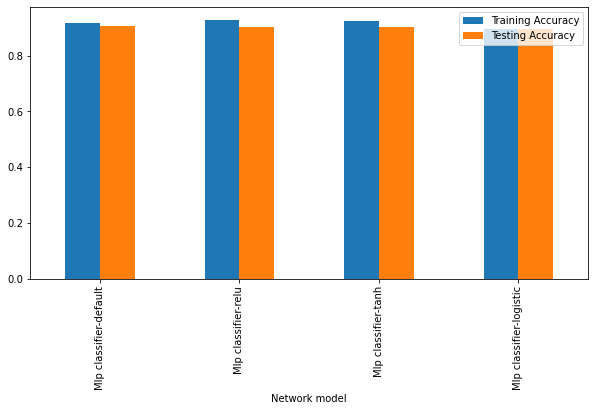

In [17]:
new_result.plot(x='Network model', y=['Training Accuracy','Testing Accuracy'] ,figsize=(10,5),kind='bar'  )

## Results of Network 2 Topology

In [18]:
new_result1=network1_default.append([network2_relu,network2_tanh,network2_logistic])
new_result1

,Network model,Training Accuracy,Testing Accuracy
0,Mlp classifier-default,0.916667,0.907534
0,Mlp classifier-relu,0.928082,0.871575
0,Mlp classifier-tanh,0.896119,0.885274
0,Mlp classifier-logistic,0.896119,0.904110


<AxesSubplot:xlabel='Network model'>

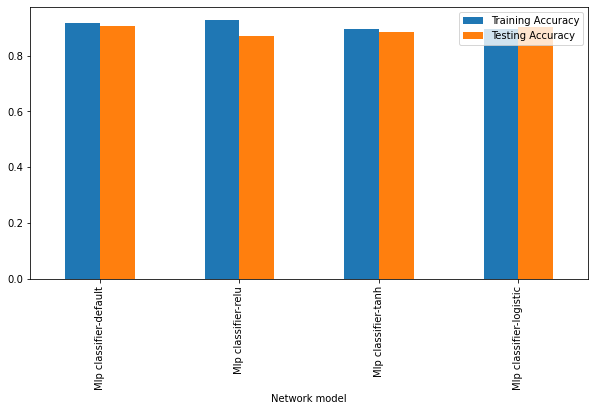

In [19]:
new_result1.plot(x='Network model', y=['Training Accuracy','Testing Accuracy'] ,figsize=(10,5),kind='bar'  )

## MLP for Regression - using California Housing Dataset

## Import Libraries and Dataset

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPRegressor

In [32]:
cal_housing = fetch_california_housing()

In [33]:
df1=pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
df = pd.DataFrame(data=cal_housing.target, columns=["target"])
dataset2=pd.concat([df1,df], axis=1)

In [34]:
dataset2.shape

(20640, 9)

In [35]:
dataset2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Correlation Matrix

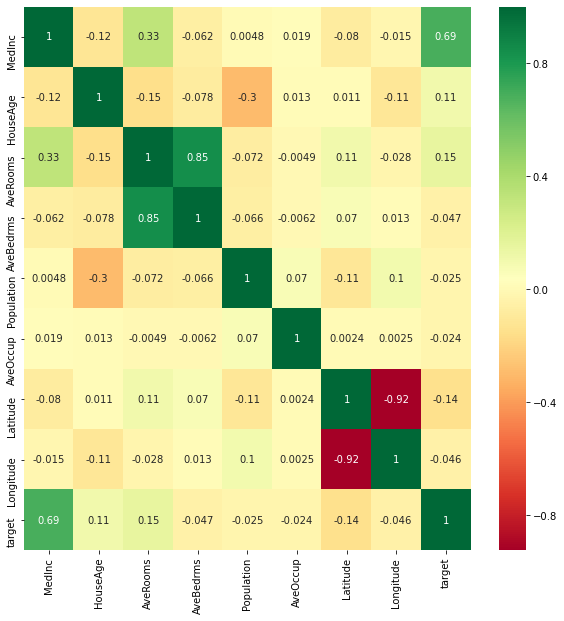

In [37]:
import seaborn as sns
x=dataset2.iloc[:,[0,7]] #independent columns
y=dataset2.iloc[:,[8]]   #target column i.e price range
#get correlations of each features in dataset
corrmat = dataset2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Splitting Training and Testing data to - 80% - 20%

In [38]:

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)
y = cal_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

### Feature Scaling

In [39]:
sc_X = StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

### Topology 1 - ReLu

In [40]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)
y_pred=reg.predict(X_test)
print("The Score : ", (r2_score(y_pred, y_test)))

The Score :  0.7633133194208844


### Topology 2 - Logistic

In [41]:
reg_2 = MLPRegressor(hidden_layer_sizes=(50,50),activation="logistic" ,random_state=1, max_iter=2000).fit(X_train, y_train)
y_pred=reg_2.predict(X_test)
print("The Score :  ", (r2_score(y_pred, y_test)))

The Score :   0.7085058870285091


### Topology 3 - Tanh

In [45]:
reg_3 = MLPRegressor(hidden_layer_sizes=(32,64,200),activation="tanh" ,random_state=1, max_iter=2000).fit(X_train, y_train)
y_pred=reg_3.predict(X_test)
print("The Score : ", (r2_score(y_pred, y_test)))

The Score :  0.6987934783447711


### Topology 4 - Identity

In [51]:
reg_4 = MLPRegressor(hidden_layer_sizes=(100),activation="identity" ,random_state=1, max_iter=2000).fit(X_train, y_train)
y_pred=reg_4.predict(X_test)
print("The Score : ", (r2_score(y_pred, y_test)))

The Score :  0.38369988828056245


### Accuracy Visualization

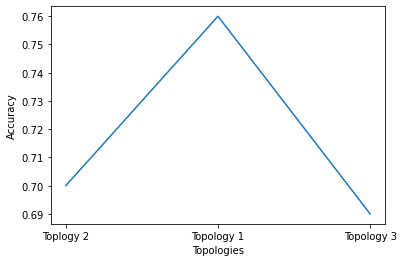

In [56]:
import seaborn as sns
accuracy = [.76,.70,.69]
hidden_layers = ['Topology 1', 'Toplogy 2', 'Topology 3']
Dataset = pd.DataFrame({'Accuracy':accuracy,'Topologies':hidden_layers})
sns.lineplot(x = 'Topologies', y = 'Accuracy', data=Dataset)
plt.show() # to show graph

## Advantages of MLP :

- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using partial_fit.

## Disadvantages of MLP :

- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

===================================================================================================== SANDHYA M 1947139